# Iterative Construction of a Penalised Vine Structure
This notebook iteratively estimate the quantile.

#### Libraries

In [18]:
import openturns as ot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

random_state = 123
np.random.seed(random_state)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Model function
This example consider the simple additive example.

In [19]:
from dependence.tests import func_overflow, margins_overflow, var_names_overflow, func_sum

test_func = func_overflow

#### Dimension and margins
We first define the problem dimension and the margins

In [20]:
margins = margins_overflow
dim = len(margins)

We chose the coefficients of the variables throught the additive function.

In [33]:
families = np.zeros((dim, dim), dtype=int)
for i in range(1, dim):
    for j in range(i):
        families[i, j] = 1
        
from dependence import iterative_vine_minimize
algorithm_parameters = {
    "n_input_sample": 10000,
    "n_dep_param_init": 10,
    "max_n_pairs": 1,
    "grid_type": 'lhs',
    "q_func": q_func,
    "n_add_pairs": 1,
    "n_remove_pairs": 0,
    "adapt_vine_structure": True,
    "with_bootstrap": False,
    "verbose": True,
    "iterative_save": False,
    "iterative_load": False,
    "load_input_samples": False,
    "keep_input_samples": False
}

quant_estimate = ConservativeEstimate(model_func=test_func, margins=margins, families=families)


iterative_results = iterative_vine_minimize(estimate_object=quant_estimate, **algorithm_parameters)

n=10000. Worst quantile of [(1, 0)] at 8.75914145085022
n=10000. Worst quantile of [(2, 0)] at 8.962669545450098
n=10000. Worst quantile of [(2, 1)] at 9.153569513108268
n=10000. Worst quantile of [(3, 0)] at 9.359518900988794
n=10000. Worst quantile of [(3, 1)] at 9.398604425097956
n=10000. Worst quantile of [(3, 2)] at 9.381564273169769
n=10000. Worst quantile of [(4, 0)] at 8.944655858615016
n=10000. Worst quantile of [(4, 1)] at 9.110742034696173
n=10000. Worst quantile of [(4, 2)] at 9.098562740090024
n=10000. Worst quantile of [(4, 3)] at 9.384075601580346
n=10000. Worst quantile of [(5, 0)] at 9.246761587382574
n=10000. Worst quantile of [(5, 1)] at 9.27136020913049
n=10000. Worst quantile of [(5, 2)] at 9.346226478715927
n=10000. Worst quantile of [(5, 3)] at 9.405368560477303
n=10000. Worst quantile of [(5, 4)] at 9.244683762819976
n=10000. Worst quantile of [(6, 0)] at 9.38880591485478
n=10000. Worst quantile of [(6, 1)] at 9.391001329552891
n=10000. Worst quantile of [(6, 2)

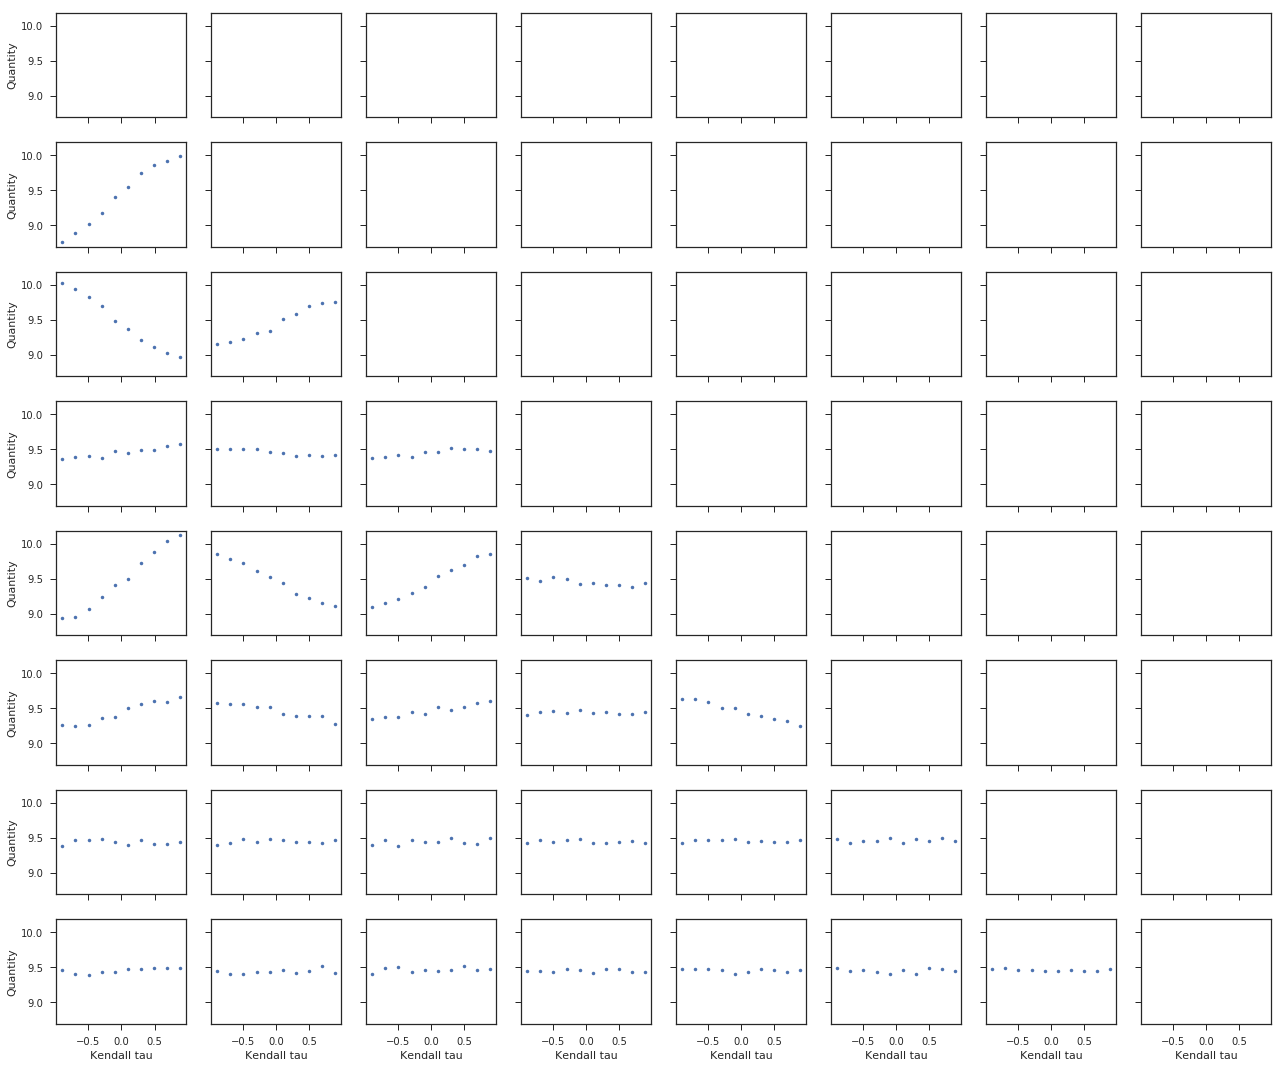

In [34]:
from dependence.dependence_plot import matrix_plot_quantities
matrix_plot_quantities(iterative_results[0], figsize=(18, 15))
# plt.savefig('output/matrix_plot.png')

## Estimations
We create an instance of the main class for conservative estimate, and we define a q_func object for the quantile as a quantity of interest

In [21]:
from dependence import ConservativeEstimate, quantile_func

alpha = 0.95

if alpha > 0.5: # Maximizing the quantile
    def q_func(x, axis=1):
        return - quantile_func(alpha)(x, axis=axis)
else: # Minimizing
    q_func = quantile_func(alpha)

In [ ]:
from dependence.utils import get_grid_sample, to_copula_params
from dependence.dependence_plot import plot_variation, compute_influence
K = 12
n = int(1E6)
pair = [1, 0]

copulas = {'Normal': [1, 1],
           'Clayton': [13, 33],
           'Gumbel': [4, 24],
           'Joe': [6, 26]}

families = np.zeros((dim, dim))
quant_estimate = ConservativeEstimate(model_func=test_func, margins=margins, families=families)
kendalls, output_samples = compute_influence(quant_estimate, K, n, copulas, pair=pair)

In [ ]:
ylabel = 'Output quantile at $\\alpha=%.2f$' % (alpha)
plot_area = 'left'

plt_lib = 'seaborn'
plot_variation(output_samples, kendalls, q_func, plot_area, ylabel=ylabel, plt_lib=plt_lib)
plt.savefig('./output/flood_example_variation_quantile_%s_K%d_n_%d_%s.pdf' % (plt_lib, 
                                                                              K, n, plot_area))

In [ ]:
plt_lib = 'matplotlib'
plot_variation(output_samples, kendalls, q_func, plot_area, ylabel=ylabel, plt_lib=plt_lib)
plt.savefig('./output/flood_example_variation_quantile_%s_K%d_n_%d_%s.pdf' % (plt_lib, 
                                                                              K, n, plot_area))

In [ ]:
plot_area = 'full'

plt_lib = 'seaborn'
plot_variation(output_samples, kendalls, q_func, plot_area, ylabel=ylabel, plt_lib=plt_lib)
plt.savefig('./output/flood_example_variation_quantile_%s_K%d_n_%d_%s.pdf' % (plt_lib, 
                                                                              K, n, plot_area))

In [ ]:
plt_lib = 'matplotlib'
plot_variation(output_samples, kendalls, q_func, plot_area, ylabel=ylabel, plt_lib=plt_lib)
plt.savefig('./output/flood_example_variation_quantile_%s_K%d_n_%d_%s.pdf' % (plt_lib, 
                                                                              K, n, plot_area))